In [1]:
import pandas as pd
# load dataset into Pandas DataFrame
df = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, columns].values
# Separating out the target
y = df.loc[:,['target']].values


In [19]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [5]:
principalDf.head()

,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [6]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [7]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
finalDf["target_n"]=le.fit_transform(finalDf["target"])
finalDf.head()

,principal component 1,principal component 2,target,target_n
0,-2.684207,0.326607,Iris-setosa,0
1,-2.715391,-0.169557,Iris-setosa,0
2,-2.889820,-0.137346,Iris-setosa,0
3,-2.746437,-0.311124,Iris-setosa,0
4,-2.728593,0.333925,Iris-setosa,0


In [10]:
model.fit(finalDf[["principal component 1","principal component 2"]],finalDf.target_n)

LogisticRegression()

In [11]:
model.predict([[-2.26454,0.505704]])

array([0])

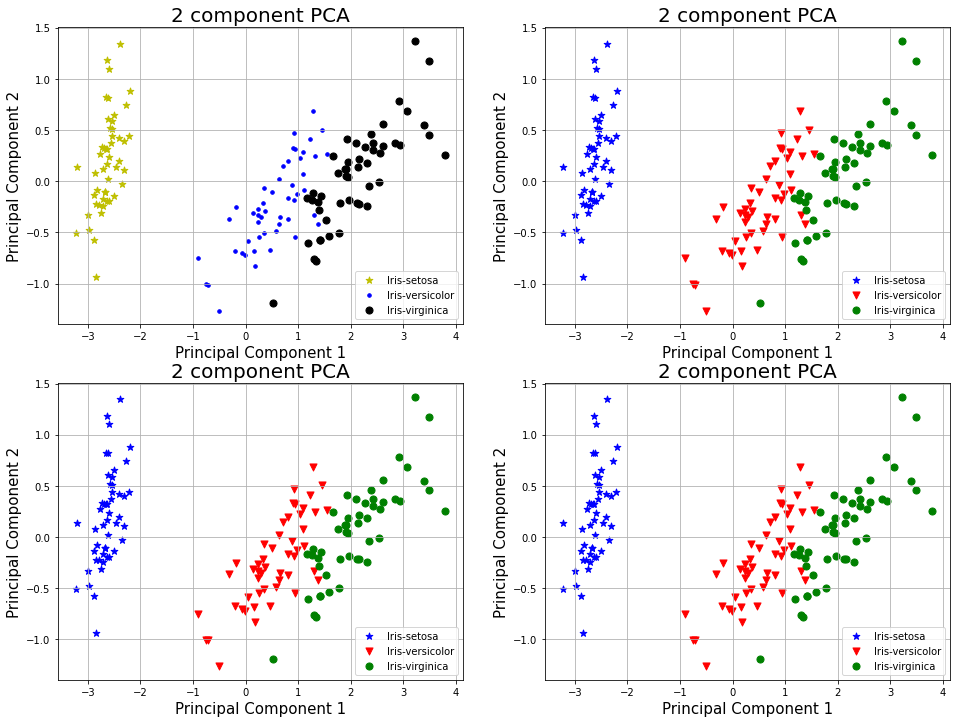

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,12))

ax = fig.add_subplot(2,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['y', 'b', 'black']
markers = ["*",".","o"]
for target, color, m in zip(targets,colors,markers):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50 ,marker=m)
               
ax.legend(targets)
ax.grid()

ax = fig.add_subplot(2,2,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'r', 'g']
markers = ["*","v","o"]
for target, color, m in zip(targets,colors,markers):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50 ,marker=m)
               
ax.legend(targets)
ax.grid()

ax = fig.add_subplot(2,2,3) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'r', 'g']
markers = ["*","v","o"]
for target, color, m in zip(targets,colors,markers):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50 ,marker=m)
               
ax.legend(targets)
ax.grid()

ax = fig.add_subplot(2,2,4) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'r', 'g']
markers = ["*","v","o"]
for target, color, m in zip(targets,colors,markers):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50 ,marker=m)
               
ax.legend(targets)
ax.grid()